In [1]:
import sys
print(sys.executable)

C:\Users\varun.bhoj\Anaconda3\envs\mlfwenv\python.exe


In [3]:
!python --version


Python 3.11.3


In [4]:
import numpy as np
import pandas as pd


In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/Varbcgi/Diabetes_prediction/main/diabetes_binary.csv")


In [26]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [32]:
def data_cleaning(data):
    print("na values available in data \n")
    print(data.isna().sum())
    data = data.dropna()
    print("after droping na values \n")
    print(data.isna().sum())
    print(data.head())
    return data

In [35]:
def preprocessing(data):
    #Drop all duplicates
    dataset.drop_duplicates(inplace=True)
    data.head()
    return data

In [12]:
def testsplit(dataset):
    y_diabetes = dataset['Diabetes_binary'].values
    X = dataset.drop(['Diabetes_binary'], axis=1)

    X = X.values

    #Splitting dataset into test and training sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size = 0.30, random_state = 44, stratify = y_diabetes)
    return X_train, X_test, y_train, y_test

In [13]:
def oversample(X_train,y_train):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(sampling_strategy='not majority')
    X_train, y_train= smote.fit_resample(X_train, y_train)

    from collections import Counter
    print('Resampled dataset shape %s' % Counter(y_train))
    return X_train, y_train

In [14]:
def training_basic_classifier(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=101)
    model.fit(X_train, y_train)
    
    return model

In [15]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [16]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [17]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [72]:
def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    import seaborn as sns
    # Compute the false positive rate (FPR), true positive rate (TPR), and threshold
    fpr, tpr, thresholds = metrics.roc_curve(X_data, y_data)
    
    # Compute the area under the ROC curve (AUC)
    roc_auc = metrics.auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    plt.savefig('roc_auc_curve.png')

In [78]:
def create_confusion_matrix_plot(clf, y_pred, y_test):
    import matplotlib.pyplot as plt
    from sklearn import metrics

    cm = metrics.confusion_matrix(y_test, y_pred)
    classes = ["non-diabetic","diabetic"]
    # Create a figure and axis
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

        # Create a figure and axis
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Plot the confusion matrix as a heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_yticklabels(classes)

    # Add text annotations
    for i in range(len(classes)):
        for j in range(len(classes)):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

    # Ensure the plot is displayed properly
    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig('confusion_matrix.png')
    plt.show()



In [87]:
def hyper_parameter_tuning(X_train, y_train):
    # define random parameters grid
    n_estimators = [5,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 50, num = 5)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6] # minimum sample number to split a node
    min_samples_leaf = [1, 3] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points
    print("Random grid")
    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    print("Random grid parameters noted")
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    print("Tuning started")
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params
    

In [33]:
cleaned_data = data_cleaning(data)

na values available in data 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
after droping na values 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost          

In [34]:
cleaned_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [37]:

final_data = preprocessing(cleaned_data)


In [38]:
X_train, X_test, y_train, y_test = testsplit(final_data)

In [40]:
X_train, y_train = oversample(X_train, y_train)

Resampled dataset shape Counter({0.0: 152834, 1.0: 152834})


In [41]:
model = training_basic_classifier(X_train,y_train)

In [42]:
y_pred = predict_on_test_data(model,X_test)

In [43]:
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [44]:
y_pred_prob = predict_prob_on_test_data(model,X_test) #model.predict_proba(X_test)

In [45]:
y_pred_prob

array([[0.97029703, 0.02970297],
       [0.82178218, 0.17821782],
       [0.84158416, 0.15841584],
       ...,
       [0.42574257, 0.57425743],
       [0.8519802 , 0.1480198 ],
       [0.63366337, 0.36633663]])

In [46]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [47]:
print(run_metrics)

{'accuracy': 0.85, 'precision': 0.45, 'recall': 0.21, 'entropy': 0.46}


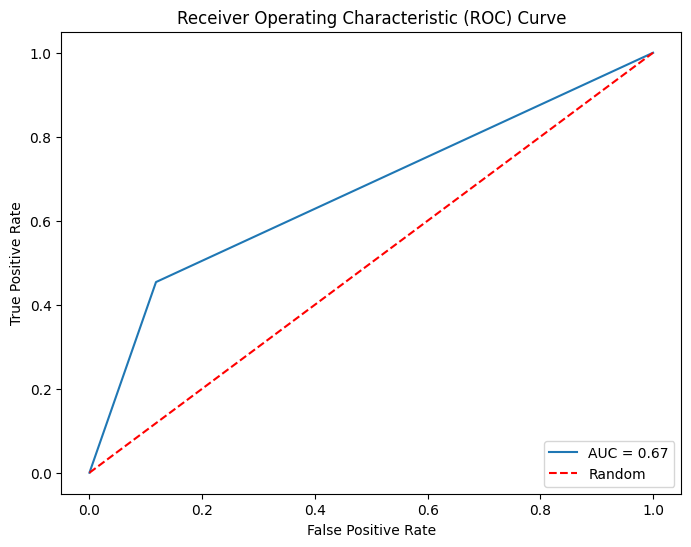

<Figure size 640x480 with 0 Axes>

In [59]:
create_roc_auc_plot(model, y_pred, y_test)

In [60]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\varun.bhoj\Anaconda3\envs\mlfwenv\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, mlflow


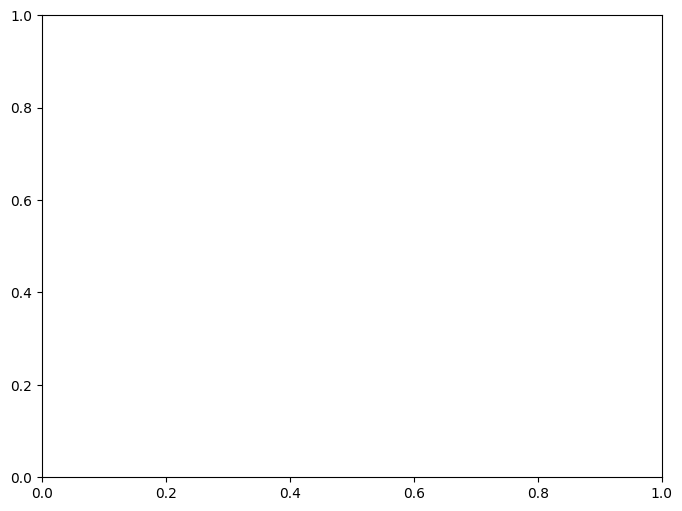

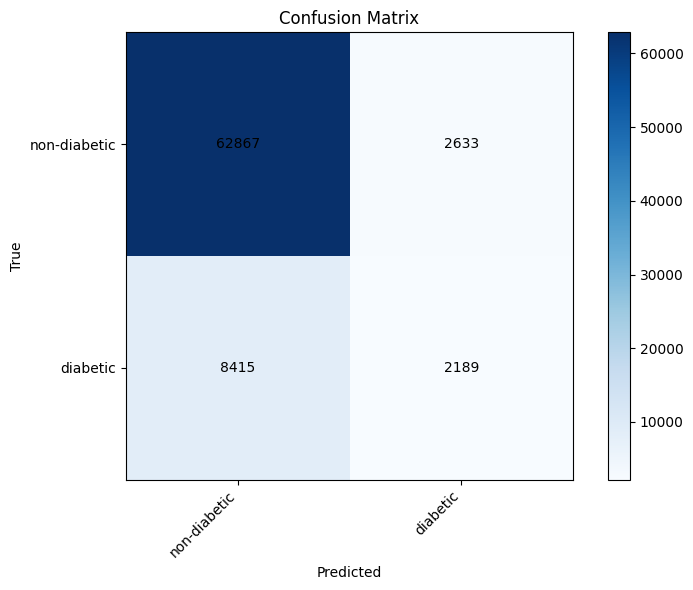

In [79]:
create_confusion_matrix_plot(model, y_pred, y_test)

In [80]:
experiment_name = "basic_classifier" ##basic classifier
run_name="term_deposit"
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
print(run_metrics)

{'accuracy': 0.85, 'precision': 0.45, 'recall': 0.21, 'entropy': 0.46}


In [94]:
def create_experiment(experiment_name,run_name, run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [83]:
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png', 'roc_auc_curve.png')


2023/06/05 19:50:48 INFO mlflow.tracking.fluent: Experiment with name 'basic_classifier' does not exist. Creating a new experiment.
C:\Users\varun.bhoj\Anaconda3\envs\mlfwenv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Run - term_deposit is logged to Experiment - basic_classifier


In [88]:
import mlflow
experiment_name = "optimized model"
run_name="Random_Search_CV_Tuned_Model"
model_tuned,best_params = hyper_parameter_tuning(X_train, y_train)
run_params = best_params

y_pred = predict_on_test_data(model_tuned,X_test) #will return the predicted class
y_pred_prob = predict_prob_on_test_data(model_tuned,X_test) #model.predict_proba(X_test)
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

Random grid
Random grid parameters noted
Tuning started
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random grid:  {'n_estimators': [5, 51, 101], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 6], 'min_samples_leaf': [1, 3], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 101, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [95]:
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png', 'roc_auc_curve.png',run_params)

Run - Random_Search_CV_Tuned_Model is logged to Experiment - optimized model


In [97]:
def create_exp_and_register_model(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment(experiment_name)
    with mlflow.start_run(run_name=run_name) as run:
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_matrix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
        mlflow.sklearn.log_model(model, "model",registered_model_name="diabetes-classifier-rcv")

In [101]:

mlflow.set_tracking_uri('http://localhost:5000')

In [103]:
import mlflow.pyfunc

model_name = "new"
stage = 'Staging'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test)
print(y_pred)

2023/06/06 20:55:21 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.3.2, required: mlflow==2.3)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


[0. 0. 0. ... 1. 0. 0.]


In [104]:
import requests

inference_request = {
        "dataframe_records": [[1,0,0,0,1,1,1,1,1,1,1,0,1,2,1,1,2,1,1,1,1]]
}

endpoint = "http://localhost:1234/invocations"

response = requests.post(endpoint, json=inference_request)

print(response.text)

{"predictions": [0.0]}
